In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [28]:
df = pd.read_csv('./Dataset/complete_dataset.csv')
df.head()

,date,month,precipitation,water_level,precipitation_7days,precipitation_15days,precipitation_30days,precipitation_t+1,precipitation_t+2,precipitation_t+3,precipitation_t+4,precipitation_t+5,precipitation_t+6,precipitation_t+7,water_level_t-1,water_level_t-2,flood_occurred,target_water_level
0,2016-01-01,1,0.0,9.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.3,9.3,False,9.3
1,2016-01-02,1,0.0,9.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.3,9.3,False,9.3
2,2016-01-03,1,0.0,9.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.3,9.3,False,9.3
3,2016-01-04,1,0.0,9.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.3,9.3,False,9.3
4,2016-01-05,1,0.0,9.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.3,9.3,False,9.3


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  3282 non-null   object 
 1   month                 3282 non-null   int64  
 2   precipitation         3282 non-null   float64
 3   water_level           3282 non-null   float64
 4   precipitation_7days   3282 non-null   float64
 5   precipitation_15days  3282 non-null   float64
 6   precipitation_30days  3282 non-null   float64
 7   precipitation_t+1     3282 non-null   float64
 8   precipitation_t+2     3282 non-null   float64
 9   precipitation_t+3     3282 non-null   float64
 10  precipitation_t+4     3282 non-null   float64
 11  precipitation_t+5     3282 non-null   float64
 12  precipitation_t+6     3282 non-null   float64
 13  precipitation_t+7     3282 non-null   float64
 14  water_level_t-1       3282 non-null   float64
 15  water_level_t-2      

In [30]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  3282 non-null   datetime64[ns]
 1   month                 3282 non-null   int64         
 2   precipitation         3282 non-null   float64       
 3   water_level           3282 non-null   float64       
 4   precipitation_7days   3282 non-null   float64       
 5   precipitation_15days  3282 non-null   float64       
 6   precipitation_30days  3282 non-null   float64       
 7   precipitation_t+1     3282 non-null   float64       
 8   precipitation_t+2     3282 non-null   float64       
 9   precipitation_t+3     3282 non-null   float64       
 10  precipitation_t+4     3282 non-null   float64       
 11  precipitation_t+5     3282 non-null   float64       
 12  precipitation_t+6     3282 non-null   float64       
 13  precipitation_t+7 

In [32]:
df = df.iloc[:3275].copy()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
def model_training(data):
    X = data[['month', 'precipitation', 'water_level', 'precipitation_7days',
              'precipitation_15days', 'precipitation_30days', 'precipitation_t+1',
              'precipitation_t+2', 'precipitation_t+3', 'precipitation_t+4',
              'precipitation_t+5', 'precipitation_t+6', 'precipitation_t+7',
              'water_level_t-1', 'water_level_t-2', 'flood_occurred', 'year']]

    y = data['target_water_level']

    # Split the dataset
    X_train = X[(df['year'] >= 2019) & (df['year'] <= 2024) & (df['month'] >= 6) & (df['month'] <= 10)].copy()
    y_train = y[(df['year'] >= 2019) & (df['year'] <= 2024) & (df['month'] >= 6) & (df['month'] <= 10)].copy()

    X_test = X[(data['year'] >= 2016) & (data['year'] <= 2018) & (df['month'] >= 6) & (df['month'] <= 10)].copy()
    y_test = y[(data['year'] >= 2016) & (data['year'] <= 2018) & (df['month'] >= 6) & (df['month'] <= 10)].copy()

    # Train the model
    rf = RandomForestRegressor(random_state=42, max_depth=50, min_samples_split=8, n_estimators=800)
    rf.fit(X_train, y_train)

    # Evaluate the model
    y_pred = rf.predict(X_test)
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))

    return rf

rf = model_training(df)


MSE: 0.3236647967571215
R²: 0.43127531058764157


In [54]:
forecast_data_2017 = df[(df['year'] == 2016)& (df['month'] >= 6) & (df['month'] <= 10)].copy()

In [55]:
X_forecast_all_features_2017 = forecast_data_2017[['month', 'precipitation', 'water_level', 'precipitation_7days',
              'precipitation_15days', 'precipitation_30days', 'precipitation_t+1',
              'precipitation_t+2', 'precipitation_t+3', 'precipitation_t+4',
              'precipitation_t+5', 'precipitation_t+6', 'precipitation_t+7',
              'water_level_t-1', 'water_level_t-2', 'flood_occurred', 'year']]
forecast_data_2017['predicted_water_level'] = rf.predict(X_forecast_all_features_2017)

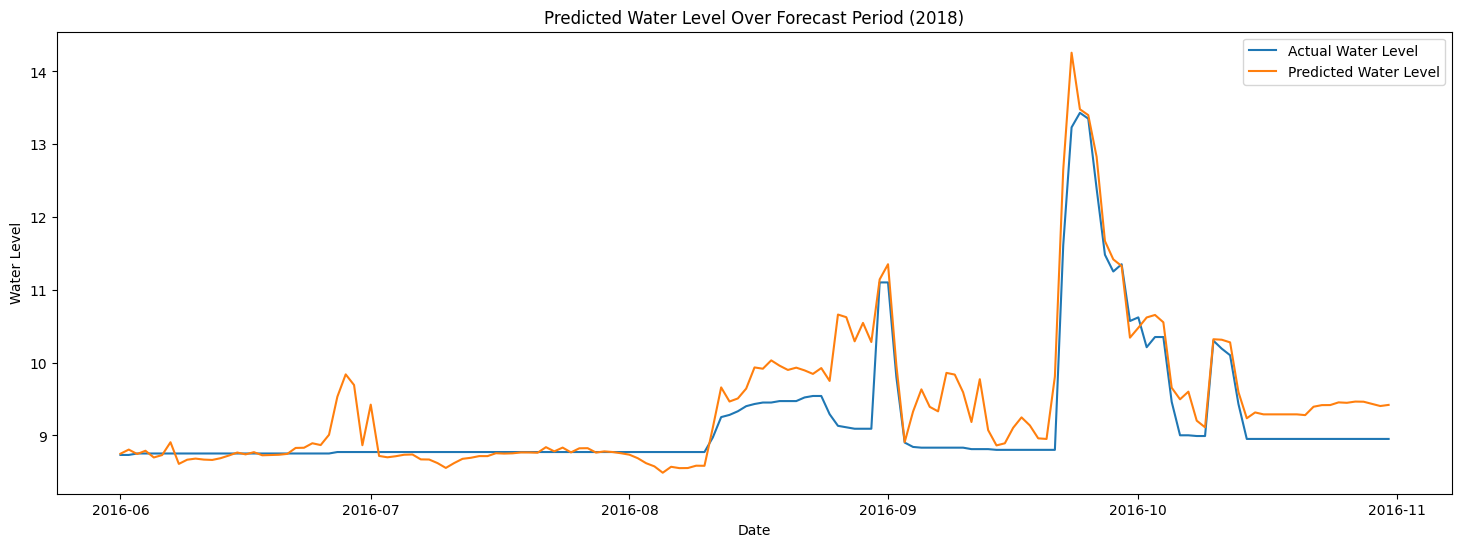

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(forecast_data_2017['date'], forecast_data_2017['water_level'], label='Actual Water Level')
plt.plot(forecast_data_2017['date'], forecast_data_2017['predicted_water_level'], label='Predicted Water Level')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Predicted Water Level Over Forecast Period (2018)')
plt.legend()
plt.show()

In [59]:
years = df['year'].unique()

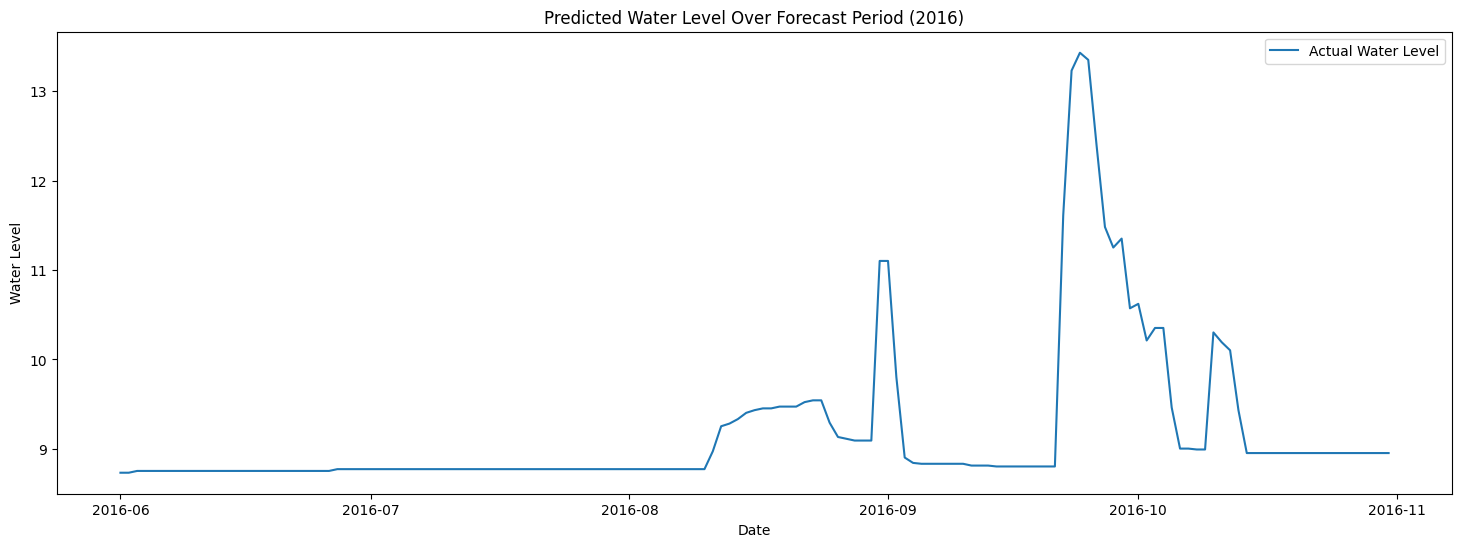

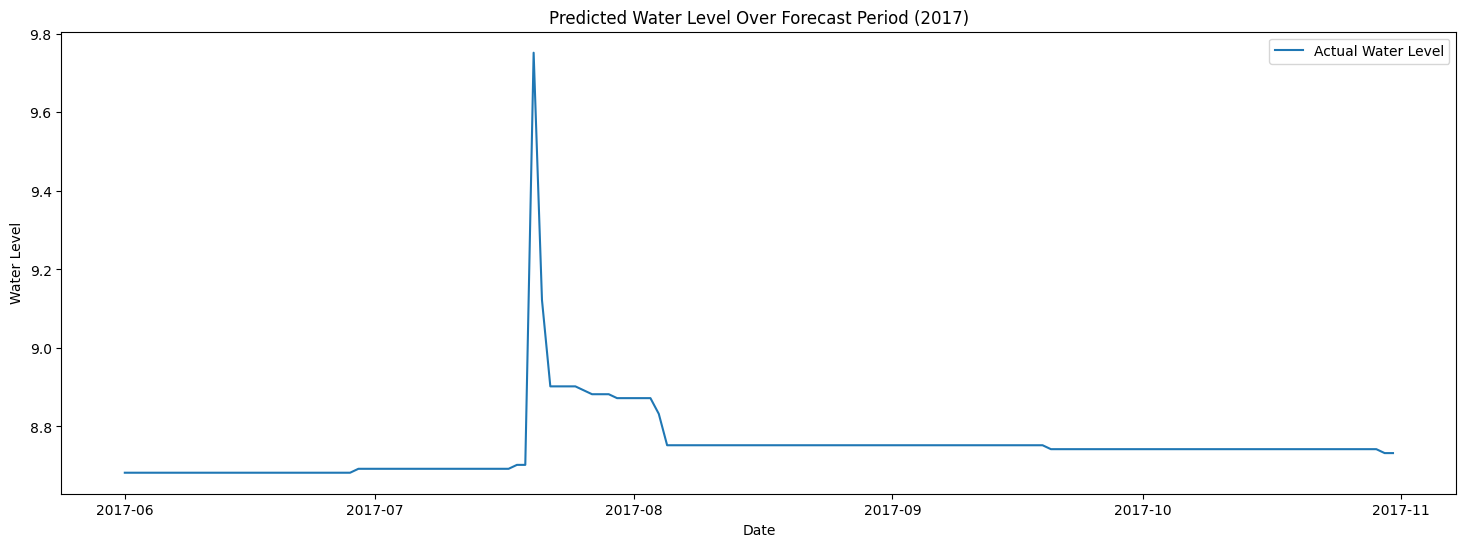

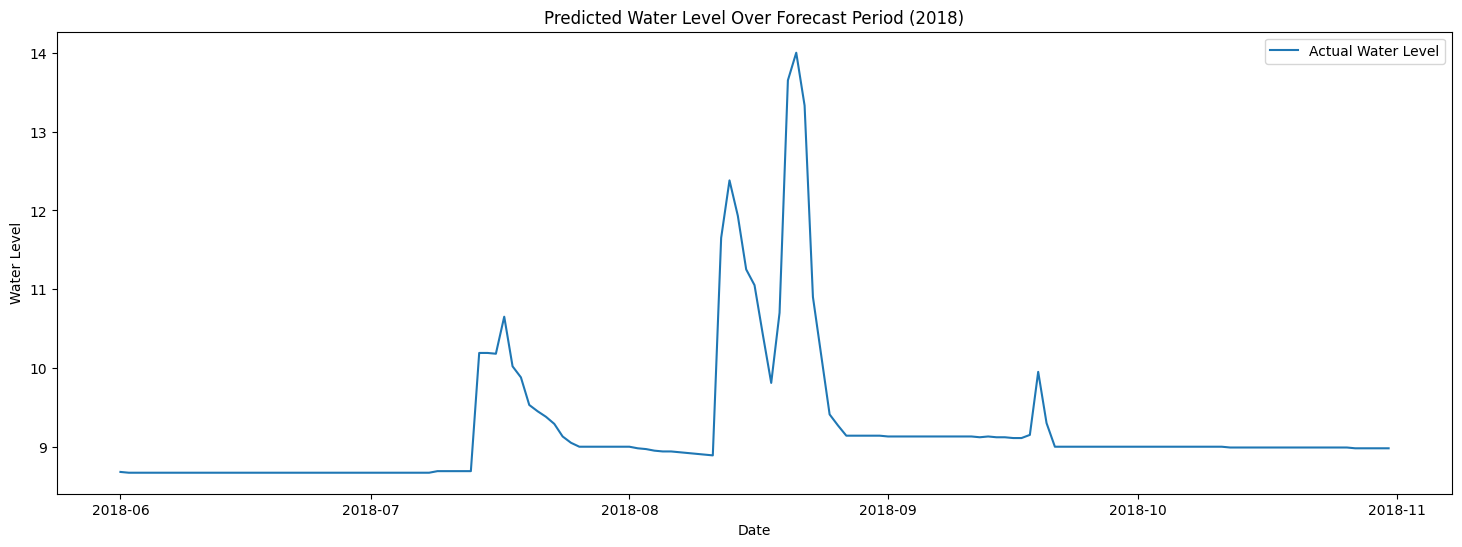

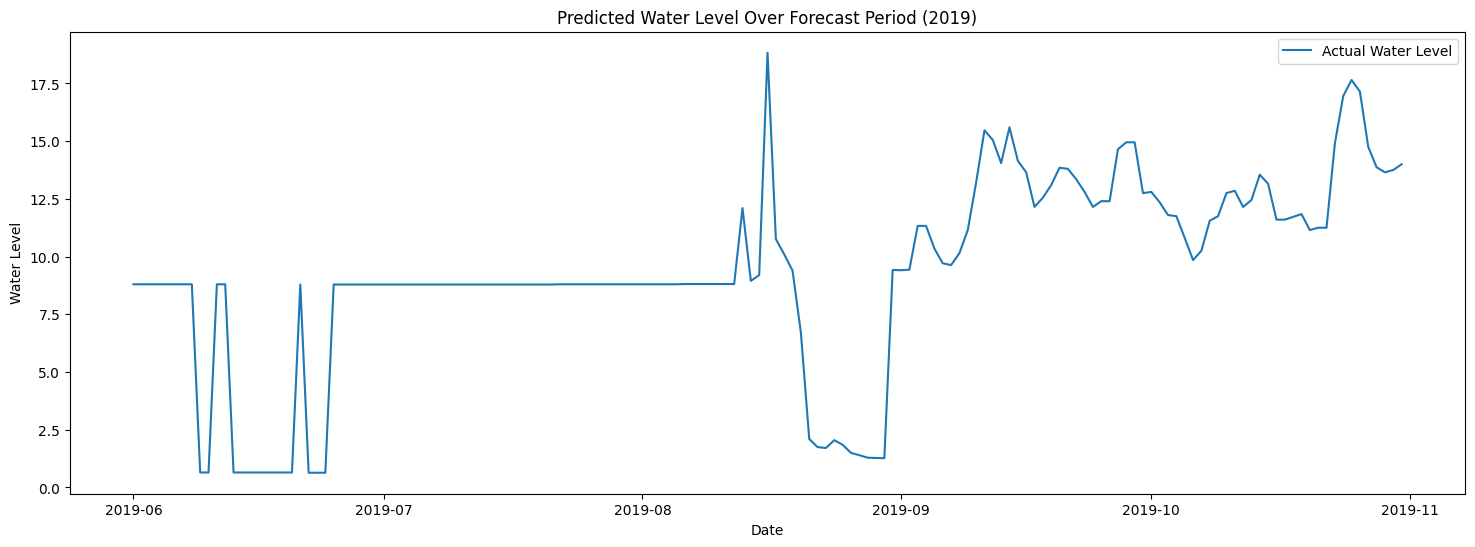

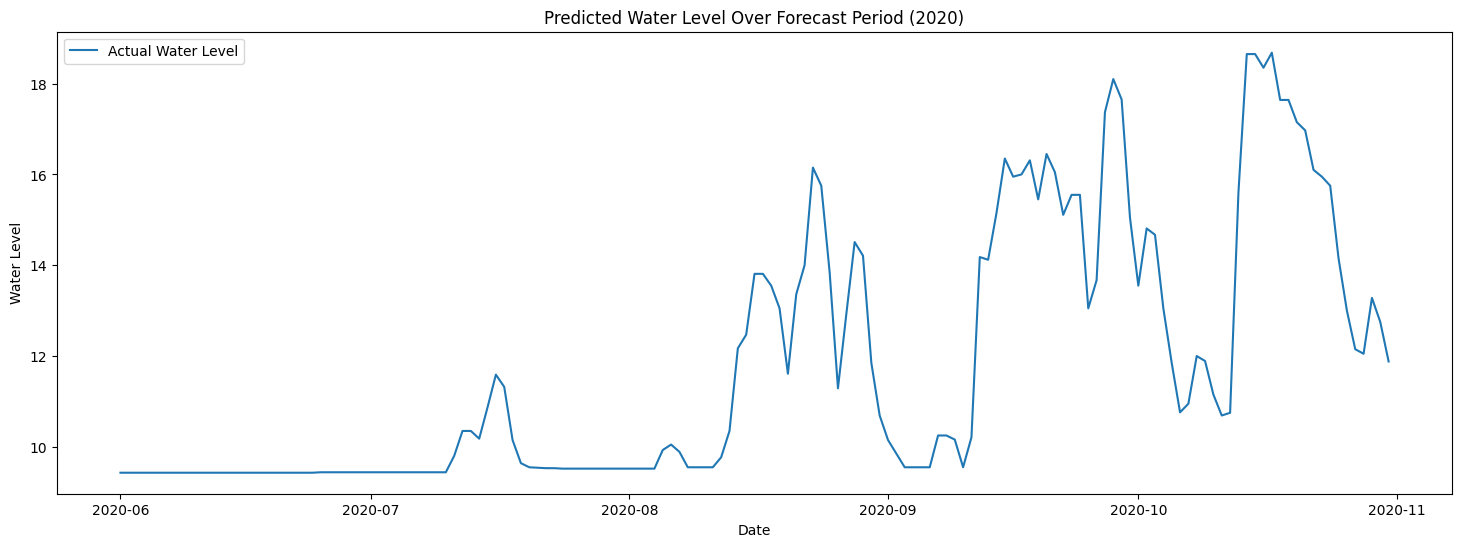

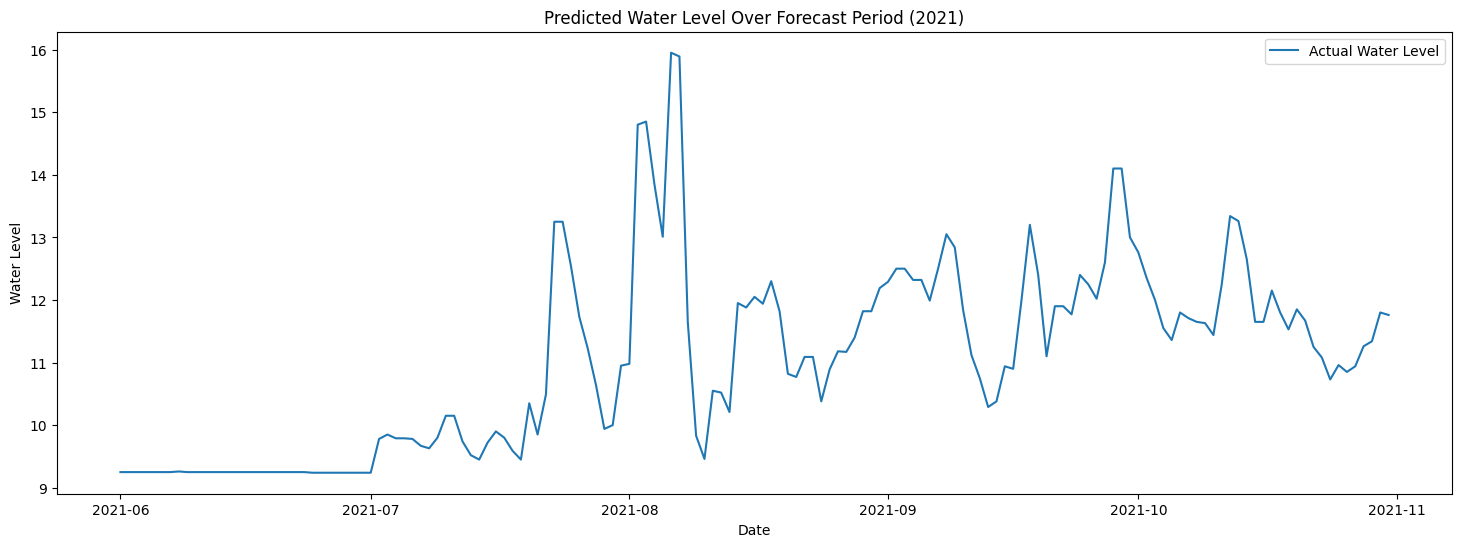

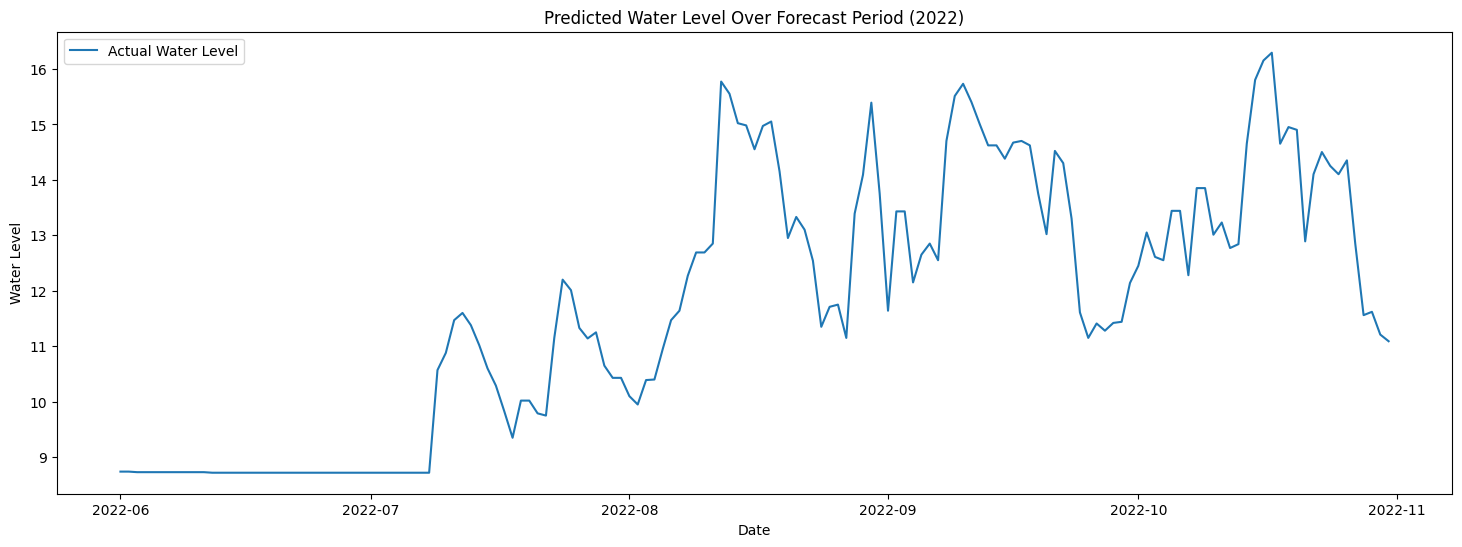

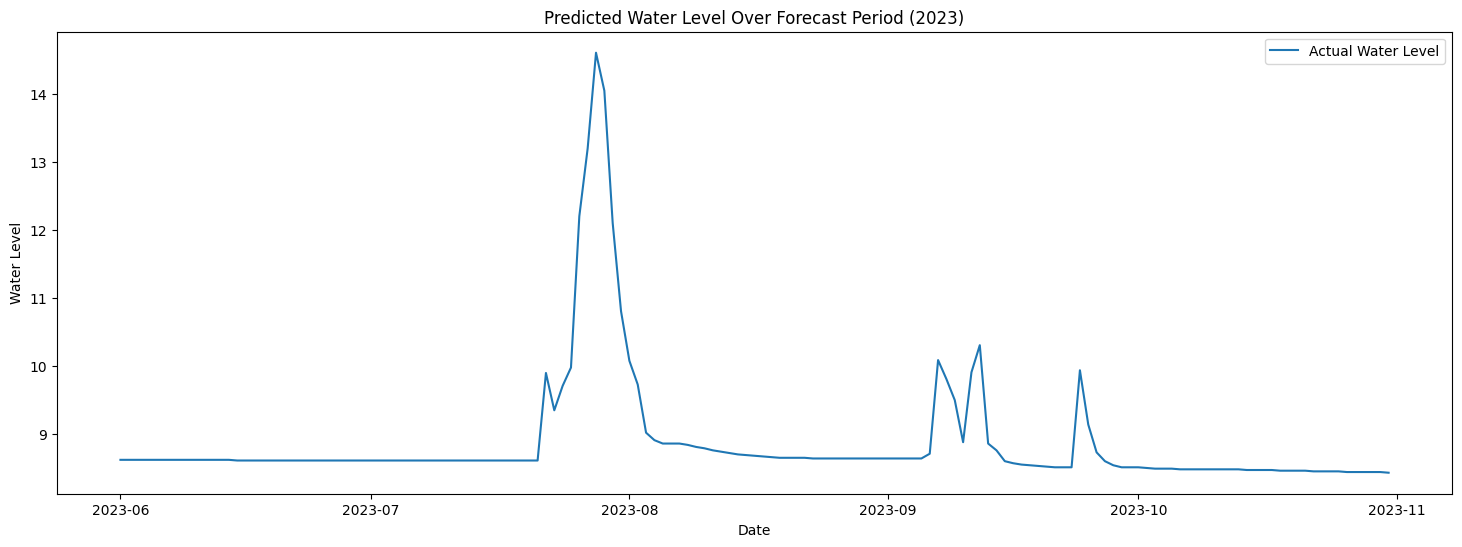

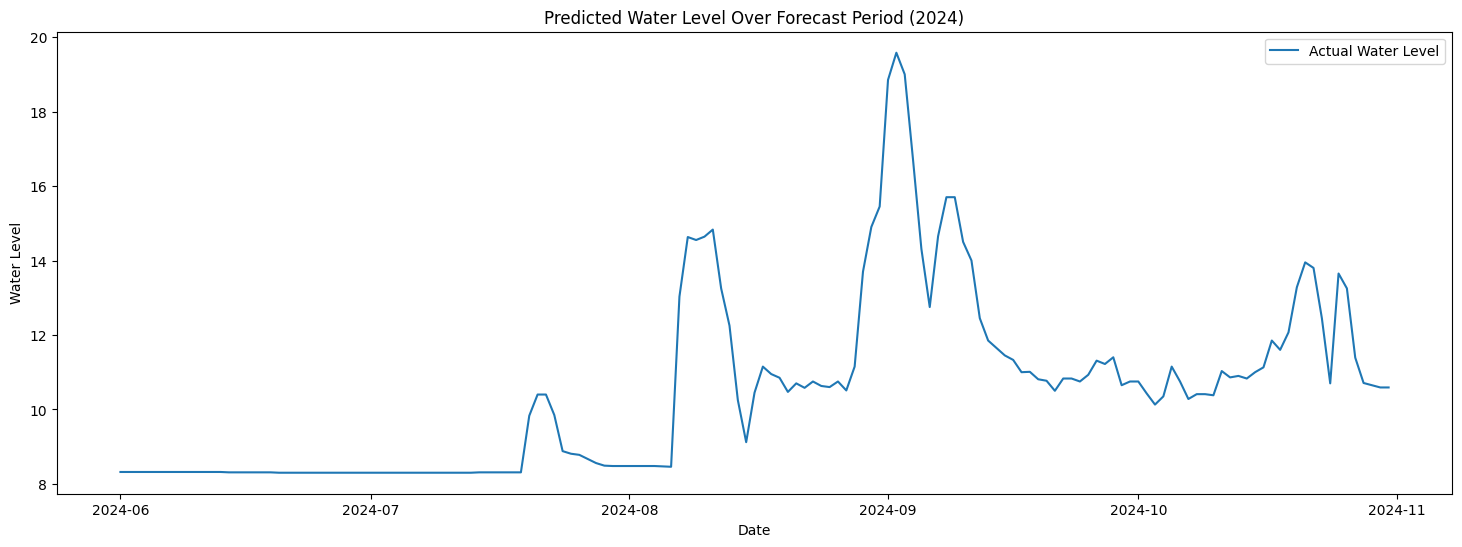

In [61]:
for year in years:
    plt.figure(figsize=(18, 6))
    forecast_data = df[(df['year'] == year)& (df['month'] >= 6) & (df['month'] <= 10)].copy()
    plt.plot(forecast_data['date'], forecast_data['water_level'], label='Actual Water Level')
    plt.xlabel('Date')
    plt.ylabel('Water Level')
    plt.title(f'Predicted Water Level Over Forecast Period ({year})')
    plt.legend()
    plt.show()